Insurance forcast using Regression

Importing libraries

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import joblib

In [90]:
df=pd.read_csv(r"C:\Users\satya\OneDrive\Desktop\ML Projects\dataset\insurance.csv")

In [91]:
df.shape

(1338, 7)

In [92]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


Checking NAN value

In [93]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [94]:
df.isnull().sum().sum()

0

In [95]:
df_num=df.select_dtypes(include=["int64",'float64'])

In [96]:
df_num

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [97]:
df_cate=df.select_dtypes(include=['O'])

In [98]:
df_cate

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [99]:
df['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

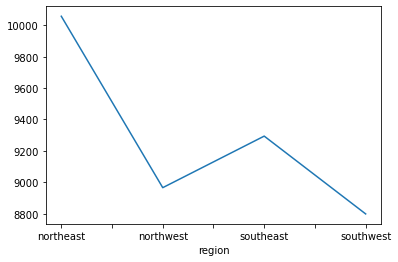

In [100]:
df.groupby('region')['charges'].median().plot()

In [101]:
df=pd.get_dummies(df,drop_first=True)

In [102]:
x=df.drop(columns=['charges'])
y=df['charges']

In [104]:
y=y.values.reshape(len(y),1)

In [105]:
sc_x=StandardScaler()
sc_y=StandardScaler()
x=sc_x.fit_transform(x)
y=sc_y.fit_transform(y)

In [106]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

Linear regression model

In [108]:
regressor1=LinearRegression()
regressor1.fit(x_train,y_train)

LinearRegression()

In [109]:
y_pred=regressor1.predict(x_test)

In [111]:
r2_score(y_test,y_pred)

0.7999876970680434

In [ ]:
Support vector regression model

In [112]:
regressor2=SVR(kernel='rbf')
regressor2.fit(x_train,y_train)

C:\Anaconda_program\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [113]:
y_pred=regressor2.predict(x_test)

In [114]:
r2_score(y_test,y_pred)

0.889217293249855

Decison tree model

In [117]:
regressor3=DecisionTreeRegressor(random_state=0)
regressor3.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [118]:
y_pred=regressor3.predict(x_test)

In [119]:
r2_score(y_test,y_pred)

0.6836757079000977

Random forest regressor model

In [120]:
regressor4=RandomForestRegressor(n_estimators=10,random_state=0)
regressor4.fit(x_train,y_train)

<ipython-input-120-a3e9831703dd>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor4.fit(x_train,y_train)


RandomForestRegressor(n_estimators=10, random_state=0)

In [121]:
y_pred=regressor4.predict(x_test)

In [122]:
r2_score(y_test,y_pred)

0.865996492443048

Polynomial feature model 

In [126]:
poly_reg=PolynomialFeatures(degree=4)
poly=poly_reg.fit_transform(x_train)
regressor5=LinearRegression()
regressor5.fit(poly,y_train)


LinearRegression()

In [128]:
y_pred=regressor5.predict(poly_reg.transform(x_test))

In [129]:
r2_score(y_test,y_pred)

0.8428560573338328

We find out the most accuracy of 88.9 with support vector regression(SVR) model.